# Использование библиотек Keras, Tensorflow для обучения нейронных сетей

**Keras** — открытая библиотека, написанная на языке Python и обеспечивающая взаимодействие с искусственными нейронными сетями. 

Библиотека содержит многочисленные реализации широко применяемых строительных блоков нейронных сетей, таких как слои, целевые и передаточные функции, оптимизаторы, и множество инструментов для упрощения работы с изображениями и текстом.

**TensorFlow** — открытая программная библиотека для машинного обучения, разработанная компанией Google для решения задач построения и тренировки нейронной сети с целью автоматического нахождения и классификации образов, достигая качества человеческого восприятия. Основной API для работы с библиотекой реализован для Python.

Изначально TensorFlow была разработана командой Google Brain для внутреннего использования в Google, в 2015 году система была переведена в свободный доступ с открытой лицензией Apache 2.0.

Устанавливаем библиотеки:

In [ ]:
!pip install keras

In [ ]:
!pip install tensorflow

## Демонстрация использования библиотек для распознавания рукописных цифр

Подключаем датасет рукописных цифр и формируем обучающее и тестовое множества.

In [1]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

2024-06-03 08:30:36.172888: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-03 08:30:36.910344: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-03 08:30:36.915283: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-03 08:30:39.873464: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Подключаем библиотеку визуализации и выводим первые несколько изображений цифр.

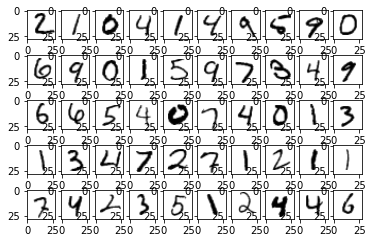

In [8]:
import matplotlib.pyplot as plt
_,axs = plt.subplots(5,10)
k = 1
for i in range(5):
    for j in range(10):
        digit = test_images[k]
        k += 1
        axs[i,j].imshow(digit, cmap = plt.cm.binary)

Выполним предварительную обработку изображений.

In [10]:
train_images = train_images.reshape((60000,28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000,28 * 28))
test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [14]:
print(train_labels[0])
train_labels[0]

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Основным строительным блоком нейронных сетей является *слой* (или *уровень*), модуль обработки данных, который можно рассматривать как фильтр для данных.

Он принимает некоторые данные и выводит их в более полезной форме. В частности, слои извлекают *представления* из подаваемых в них данных, которые, как мы надеемся, будут иметь больше смысла для решения задачи. Фактически методика глубокого обучения заключается в объединении простых слоев, реализующих некоторую форму поэтапной *очистки данных*. Модель глубокого обучения можно сравнить с ситом, состоящим из последовательности фильтров все более тонкой очистки данных - слоев.

В нашем случае сеть будет состоять из последовательности двух слоев Dense, которые являются *полносвязными* нейронными слоями. Второй (и последний) слой - это 10-переменный слой потерь (softmax layer), возвращающий массив с 10 оценками вероятностей (в сумме дающих 1).

Каждая оценка определяет вероятность принадлежности текущего изображения к одному из 10 классов цифр.

Чтобы подготовить сеть к обучению, нужно настроить еще три параметра для этапа *компиляции*:

- *функция потерь*, которая определяет, как сеть должна оценивать качество своей работы на обучающих данных и, соответственно, как корректировать ее в правильном направлении;
- *оптимизатор* - механизм, с помощью которого сеть будет обновлять себя, опираясь на наблюдаемые данные и функцию потерь.
- *метрики для мониторинга на этапах обучения и тестирования* - здесь нас будет интересовать только точность (доля правильно классифицированных изображений).

In [9]:
#Конструируем сеть

from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape = (28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

#Компиляция сети
network.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

Теперь можно начинать обучение, для чего в Keras достаточно вызвать метод fit - он пытается *адаптировать* модель под обучающие данные.

In [61]:
train_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
network.fit(train_images,train_labels, epochs = 5, batch_size = 128)

2024-06-03 09:12:41.516812: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
469/469 [==============================] - 7s 13ms/step - loss: 0.2652 - accuracy: 0.9229
Epoch 2/5
469/469 [==============================] - 6s 13ms/step - loss: 0.1057 - accuracy: 0.9693
Epoch 3/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0702 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0506 - accuracy: 0.9844
Epoch 5/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0382 - accuracy: 0.9885


Оцениваем функцию потерь и точность модели на тестовой выборке:

In [16]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print(test_loss)
print(test_acc)

2024-06-03 09:15:10.609293: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 2s 4ms/step - loss: 0.0722 - accuracy: 0.9778
0.0721844807267189
0.9778000116348267


Пробуем использовать нейронную сеть для предсказания на тестовой выборке:

In [19]:
ynew = network.predict(test_images)

2024-06-03 09:22:38.803264: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 4ms/step


In [30]:
import numpy as np

for i in range(30):
    print(np.argmax(test_labels[i]), np.argmax(ynew[i]))

7 7
2 2
1 1
0 0
4 4
1 1
4 4
9 9
5 6
9 9
0 0
6 6
9 9
0 0
1 1
5 5
9 9
7 7
3 3
4 4
9 9
6 6
6 6
5 5
4 4
0 0
7 7
4 4
0 0
1 1


In [38]:
#Определяем суммарное количество ошибок

count_error = 0

for i in range(len(ynew)):
    if np.argmax(test_labels[i]) != np.argmax(ynew[i]):
        count_error += 1
print(count_error, len(ynew))

222 10000


Попробуем улучшить точность модели усложнением ее структуры:

In [33]:
network = models.Sequential()
network.add(layers.Dense(1024, activation='relu', input_shape = (28 * 28,)))
network.add(layers.Dense(1024, activation='relu', input_shape = (1024,)))
network.add(layers.Dense(10, activation='softmax'))

#Компиляция сети
network.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

In [34]:
network.fit(train_images,train_labels, epochs = 5, batch_size = 128)

Epoch 1/5


2024-06-03 09:37:08.603797: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


469/469 [==============================] - 26s 54ms/step - loss: 0.2188 - accuracy: 0.9319
Epoch 2/5
469/469 [==============================] - 25s 54ms/step - loss: 0.0769 - accuracy: 0.9755
Epoch 3/5
469/469 [==============================] - 26s 55ms/step - loss: 0.0491 - accuracy: 0.9847
Epoch 4/5
469/469 [==============================] - 26s 56ms/step - loss: 0.0344 - accuracy: 0.9888
Epoch 5/5
469/469 [==============================] - 27s 58ms/step - loss: 0.0229 - accuracy: 0.9926


In [39]:
ynew2 = network.predict(test_images)

count_error = 0

for i in range(len(ynew)):
    if np.argmax(test_labels[i]) != np.argmax(ynew2[i]):
        count_error += 1
print(count_error, len(ynew))

  1/313 [..............................] - ETA: 19s

2024-06-03 09:44:10.594401: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 3s 8ms/step
214 10000


## Демонстрация использования библиотек для построения шумовой карты

В предыдущем примере мы познакомились с задачей классификации, цель которой состояла в предсказании одной дискретной метки для образца входных данных. 

Другим распространенным типом задач машинного обучения является **регрессия**, которая заключается в предсказании не дискретной метки, а значения на непрерывнй числовой прямой: например, предсказание курса акций от различных экономических показателей. Рассмотрим такой класс задач на примере построения шумовой карты с упрощенным детерминированным заданием уровня шума на плоскости.

**Задающие воздействия шума**

$$f(x,y) = \cos(x)\cdot \sin(y)+\sin(10y)\cdot \cos(5x)$$

In [85]:
#Формируем шумовую карту

import numpy as np
def f(x,y):
  return np.cos(x)*np.sin(y)+ np.sin(10*y)*np.cos(5*x)
zz = []
for x in [x / 100.0 for x in range(0, 100, 1)]:
  z = []
  for y in [y / 100.0 for y in range(0, 100, 1)]:
    z.append(f(x,y))
  zz.append(z)

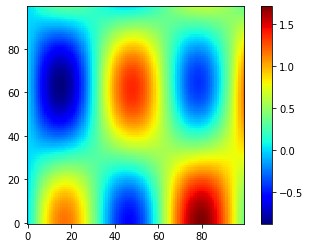

In [86]:
# Визуализируем шумовую карту

import matplotlib.pyplot as p
p.imshow(zz,interpolation='None',cmap=p.cm.jet,origin='lower')
p.colorbar()

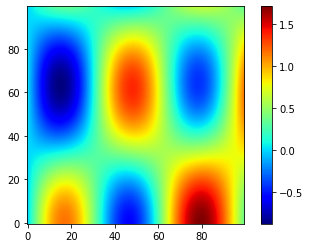

In [87]:
# Визуализируем шумовую карту с интерполяцией

import matplotlib.pyplot as p
p.imshow(zz,interpolation='bilinear',cmap=p.cm.jet,origin='lower')
p.colorbar()

Пробуем уменьшить шаг дискретизации

In [88]:
#Формируем шумовую карту

import numpy as np
def f(x,y):
  return np.cos(x)*np.sin(y)+ np.sin(10*y)*np.cos(5*x)
zz = []
for x in [x / 10 for x in range(0, 10, 1)]:
  z = []
  for y in [y / 10 for y in range(0, 10, 1)]:
    z.append(f(x,y))
  zz.append(z)

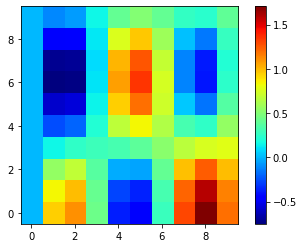

In [89]:
# Визуализируем шумовую карту

import matplotlib.pyplot as p
p.imshow(zz,interpolation='None',cmap=p.cm.jet,origin='lower')
p.colorbar()

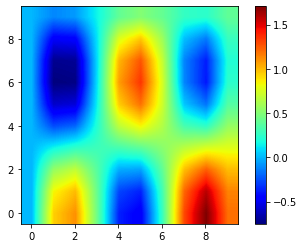

In [90]:
import matplotlib.pyplot as p
p.imshow(zz,interpolation='bilinear',cmap=p.cm.jet,origin='lower')
p.colorbar()

In [91]:
zz

[[0.0,
  0.9413044014547247,
  1.1079667576207428,
  0.43664021472120673,
  -0.3673841529992777,
  -0.47949873605893545,
  0.2852269751961095,
  1.30120428595648,
  1.7067143375229046,
  1.19544539486924],
 [0.0,
  0.8377949280016594,
  0.9956603770080894,
  0.41788829475902417,
  -0.2766838000445871,
  -0.36450481376590155,
  0.3166114441796589,
  1.2175592645785562,
  1.582015843131702,
  1.1410815339345501],
 [0.0,
  0.5524921084200967,
  0.6860046675882072,
  0.36587694338439225,
  -0.027246231206587312,
  -0.04824004980391183,
  0.40241837863191193,
  0.9863475983280712,
  1.2376092710817388,
  0.9903810915165692],
 [0.0,
  0.1548978085066714,
  0.254117216435979,
  0.2923036711669963,
  0.3184914612090419,
  0.39018109104638976,
  0.5196584876992324,
  0.6619180570848227,
  0.7553008831458223,
  0.7774928880826653],
 [0.0,
  -0.25822282240258293,
  -0.19541467635397708,
  0.21346549036781043,
  0.6736190097631394,
  0.840633466526484,
  0.6363480334592057,
  0.31996088865069644,


Сформируем обучающее множество для нейронной сети.

In [132]:
import numpy as np
def f(x,y):
  return np.cos(x)*np.sin(y)+ np.sin(10*y)*np.cos(5*x)
zz = []
xy = []

for x in [x / 50 for x in range(0, 50, 1)]:
  for y in [y / 50 for y in range(0, 50, 1)]:
        zz.append(f(x,y))
        xy.append([x,y])

In [133]:
len(xy)

2500

In [134]:
xy[2499]

[0.98, 0.98]

In [135]:
len(zz)

2500

**Конструирование сети**

При конструировании сети важно найти правильный баланс между усложнением структуры сети и объемом исходных данных. Чем меньше обучающих данных, тем быстрее сложная сеть (содержащая большое количество нейронов) достигает переобучения (т.е. просто запонимает весь обучающий набор, а не пытаться его аппроксимировать).

In [140]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(50, activation='relu', input_shape = (2,)))
model.add(layers.Dense(30, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])

Как видно, сеть состоит из трех слоев - первый слой содержит 50 нейронов, второй слой содержит 30 нейронов. Последний слой заканчивается одномерным слоем, не имеющим функции активации (линейный слой). Это типичная конфигурация для регресии - предсказания одного значения на непрерывной шкале. 

In [144]:
model.fit(np.array(xy),np.array(zz), epochs = 50, batch_size = 10)

Epoch 1/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0499 - mae: 0.1707
Epoch 2/50
250/250 [==============================] - 1s 4ms/step - loss: 0.0464 - mae: 0.1635
Epoch 3/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0448 - mae: 0.1595
Epoch 4/50
250/250 [==============================] - 1s 3ms/step - loss: 0.0420 - mae: 0.1530
Epoch 5/50
250/250 [==============================] - 1s 4ms/step - loss: 0.0394 - mae: 0.1473
Epoch 6/50
250/250 [==============================] - 1s 4ms/step - loss: 0.0371 - mae: 0.1410
Epoch 7/50
250/250 [==============================] - 1s 4ms/step - loss: 0.0357 - mae: 0.1378
Epoch 8/50
250/250 [==============================] - 1s 4ms/step - loss: 0.0334 - mae: 0.1315
Epoch 9/50
250/250 [==============================] - 1s 4ms/step - loss: 0.0312 - mae: 0.1273
Epoch 10/50
250/250 [==============================] - 1s 4ms/step - loss: 0.0295 - mae: 0.1224
Epoch 11/50
250/250 [============================

In [145]:
pred = model.predict(np.array(xy))
zz_new = []
k = 0
for i in range(50):
    z = []
    for j in range(50):
        z.append(pred[k])
        k += 1
    zz_new.append(z)

79/79 [==============================] - 0s 3ms/step


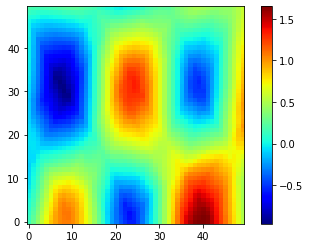

In [147]:
import matplotlib.pyplot as p
p.imshow(zz_new,interpolation='None',cmap=p.cm.jet,origin='lower')
p.colorbar()

In [159]:
print(model.predict([xy[2]]))
print(zz[2])

1/1 [==============================] - 0s 61ms/step
[[0.42350817]]
0.42940767649528466


Пробуем теперь детализировать данные с использованием нейронной сети.

In [164]:
xy_new = []
for i in range(1000):
    for j in range(1000):
        xy_new.append([i/1000,j/1000])

In [165]:
pred = model.predict(np.array(xy_new))
zzz_new = []
k = 0
for i in range(1000):
    z = []
    for j in range(1000):
        z.append(pred[k])
        k += 1
    zzz_new.append(z)

31250/31250 [==============================] - 90s 3ms/step


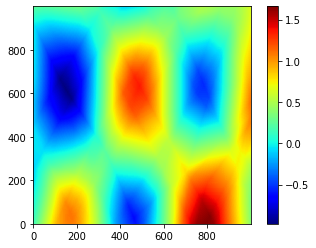

In [166]:
import matplotlib.pyplot as p
p.imshow(zzz_new,interpolation='None',cmap=p.cm.jet,origin='lower')
p.colorbar()